## Term Project - Biswajit Sharma

### Prediction of Obesity risk based on eating habits and physical activity

Obesity is a medical condition that is related to the excessive accumulation of body fat. It is not only a cosmetic concern but rather a medical problem that increases the risk of other health problems and diseases like heart diseases, diabetes, high cholesterol, high blood pressure, liver disease, musculoskeletal disorders, and certain cancers. Since 1997, WHO has considered obesity a global epidemic and a significant health problem. To prevent obesity, various organizations, including government and non-government, are promoting campaigns regarding two main risk factors: eating habits and physical activity (Gozukara et al., 2023).

Although it is known that excessive intake of calories can cause obesity, nutritional factors like low-quality diet, unbalanced diet, processed foods, and alcohol consumption can also increase the risk of obesity. Physical activity has also been very influential in controlling or preventing obesity.  The frequency, duration, and intensity of physical activity and exercises play an essential role in the effective prevention and reduction of obesity (Gozukara et al., 2023). Eating healthy and nutrituous food helps in managing proper body weight and preventing obesity. Therefore, it becomes important to invest resources in investigating the relationship of obesity with eating habits and physical activity. 

Healthcare plans can perform data mining and build a model to predict the early detection of obesity risk for their members, which can yield enormous benefits for both health plans and their members. Early detection of obesity risk helps individuals to be aware of the risk and take preventive measures so that they do not develop obesity related health conditions and diseases in the later stages of their life. It also helps health plans to intervene and incentivize members to motivate them in practicing obesity management such as healthy eating habits, exercises, and increased physical activity. This reduces the number of related health claims caused by obesity related diseases and essentially allows health plans to reduce the cost of care, enhance competitiveness and generate more revenue.

This study will generate and evaluate a model to _predict obesity risk based on eating habits and physical activity_

#### Dataset

_[UC Irvine Machine Learning Repository - Obesity levels, Eating Having and Physical activity dataset.][1]_

This dataset include data about eating habits, physical activity, weight, height and obesity levels of individuals from the countries of mexico, Peru and Columbia. The data includes the eating habits and physical activity levels of 498 participants aged between 14 and 61 years (UCI. 2019).

The originally collected data was preprocessed, such as the removal of missing values, and normalization was performed. It was also balanced to reduce the skewness of the obesity levels. 23% of the source data is actual responses collected over a 30-day survey, while the remaining 77% was synthetically generated using SMOTE (Palechor & de la Hoz Manotas, 2019).

There are 17 variables in the dataset.

 - Gender - male or female
 - Age - age in years
 - Height - height in meters
 - Weight - weight in kgs
 - Family History of overweight - yes or no
 - Frequently consume high caloric food (FAVC) - yes or no
 - Consumption of vegetables in meals (FCVC)
 - Number of main meals (NCP)
 - Consumption of food between meals (CAEC)
 - Daily consumption of water (CH20)
 - Consumption of alcohol (CALC) - no, sometimes, frequently or always
 - Calorie consumption monitoring done (SCC) - yes or no
 - Frequency of Physical activity (FAF)
 - Use of electronic devices (TUE)
 - Mode of transportation used (MTRANS) - automobile, motorbike, bike, public transportation, walking
 - Obesity Level - the obesity level of the individual

Obesity level is labelled in the source data with classes as given below. 

 - Insufficient Weight 
 - Normal Weight
 - Overweight I
 - Overweight II
 - Obesity I
 - Obesity II
 - Obesity III

[1]: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

#### Analysis

In [1]:
# import required modules

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from pandas.api.types import CategoricalDtype

In [2]:
# read dataset into pandas dataframe
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
# view few rows
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
#convert all column names to lower case for consistent case
col_names = {cols: cols.lower()
 for cols in df.columns
}

df = df.rename(columns=col_names)

In [5]:
# view few rows
df.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
#check dimensions of dataset
df.shape

(2111, 17)

In [7]:
# define numerical features, categorical features and target

numerical_features = ["age", "fcvc", "ncp", "ch2o","faf", "tue","height","weight"]
categorical_features = ["gender", "family_history_with_overweight", "favc", "caec", "smoke", "scc", "calc", "mtrans"]
target = "nobeyesdad"

In [8]:
# Summary stats of numerical variables
df[numerical_features].describe()

,age,fcvc,ncp,ch2o,faf,tue,height,weight
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,2.419043,2.685628,2.008011,1.010298,0.657866,1.701677,86.586058
std,6.345968,0.533927,0.778039,0.612953,0.850592,0.608927,0.093305,26.191172
min,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.450000,39.000000
25%,19.947192,2.000000,2.658738,1.584812,0.124505,0.000000,1.630000,65.473343
50%,22.777890,2.385502,3.000000,2.000000,1.000000,0.625350,1.700499,83.000000
75%,26.000000,3.000000,3.000000,2.477420,1.666678,1.000000,1.768464,107.430682
max,61.000000,3.000000,4.000000,3.000000,3.000000,2.000000,1.980000,173.000000


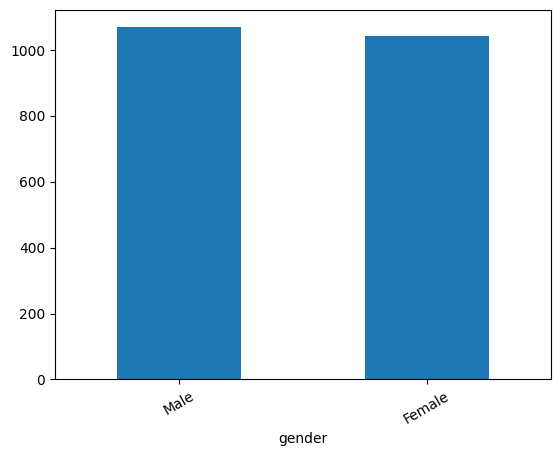

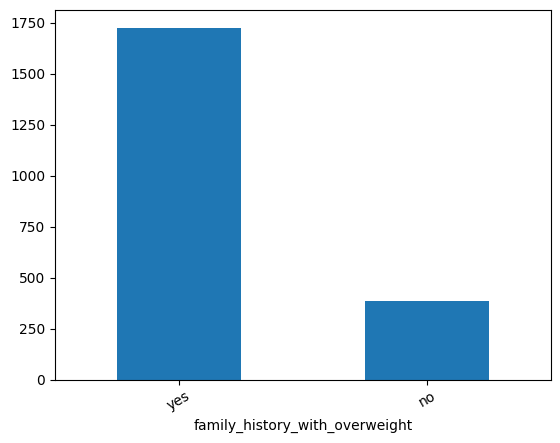

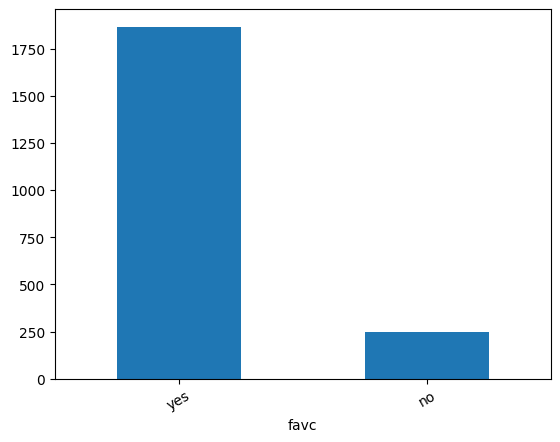

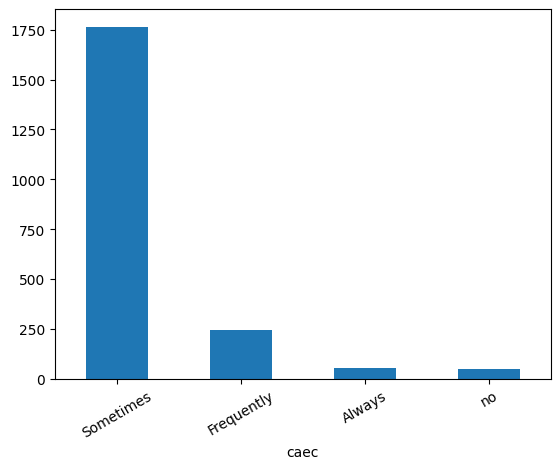

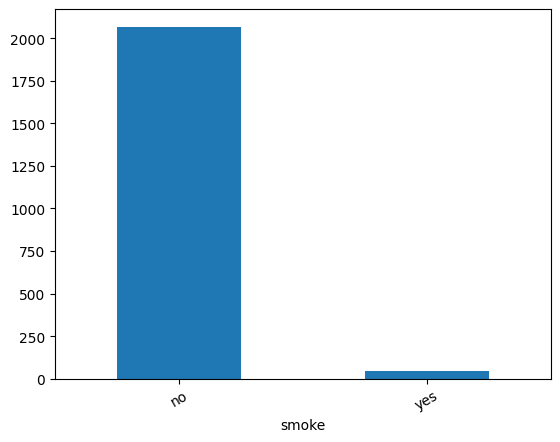

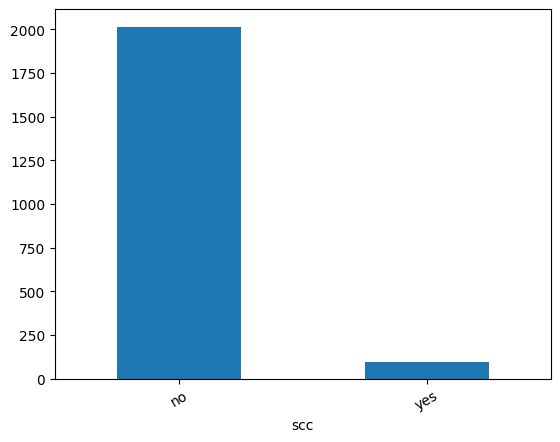

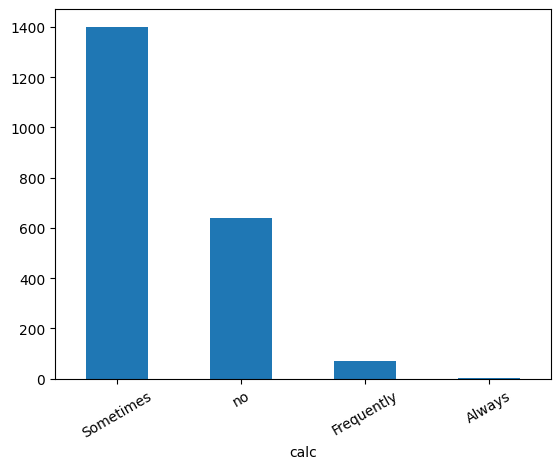

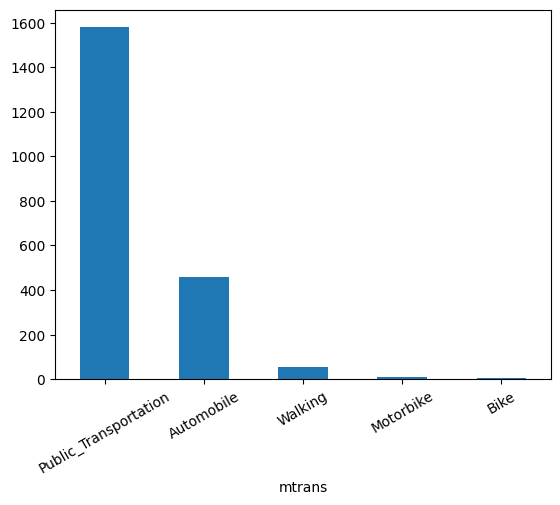

In [9]:
# check for distribution of levels in categorical variables
for cols in categorical_features:
    freq = df[cols].value_counts()
    freq.plot(kind="bar")
    plt.xlabel(cols)
    plt.xticks(rotation=30)
    plt.show()

- Very few individuals who use Motorbike and bikes as modes of transportation
- Male and Female individuals are well balanced in the dataset
- There are more individuals with family history of overweight
- Most of the individuals in the dataset sometimes consumes alcohol and very less number of individulas who heavily consume acohol.
- Most of the individuals in the dataset do not smoke.
- Very less number of inndividuals never consumes food between meals. Most of the individuals sometimes consume food between meals.

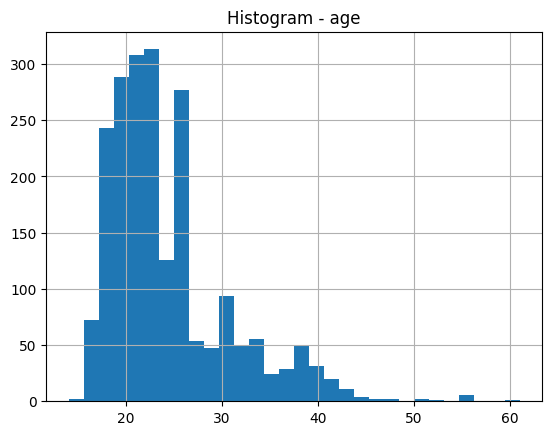

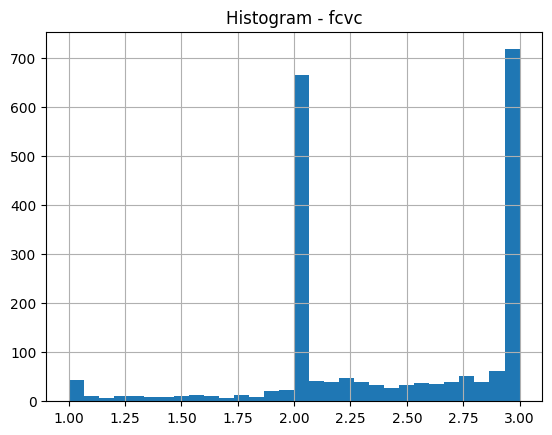

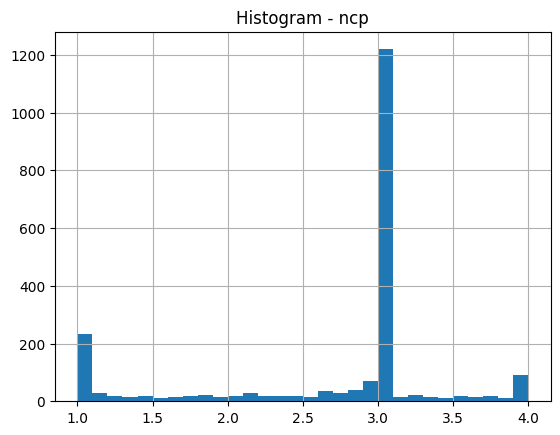

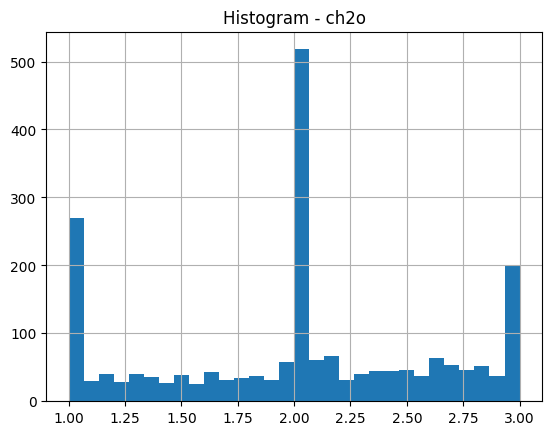

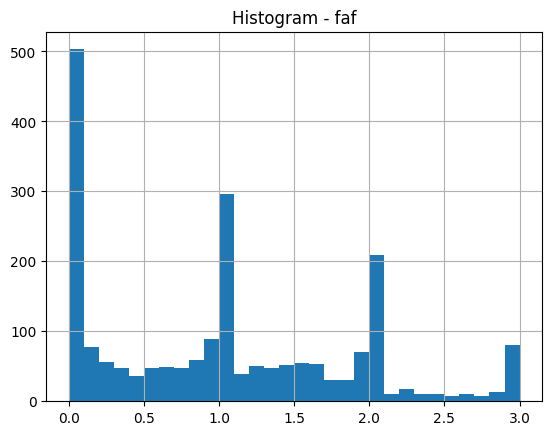

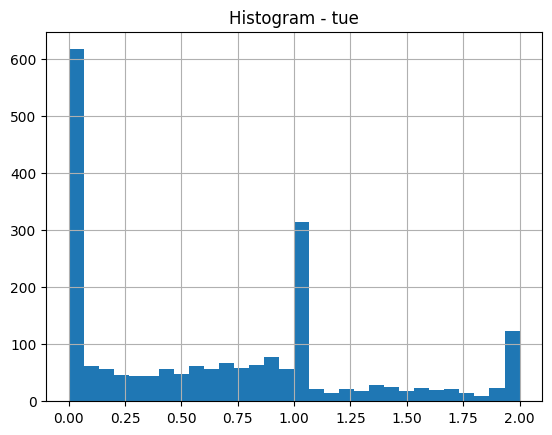

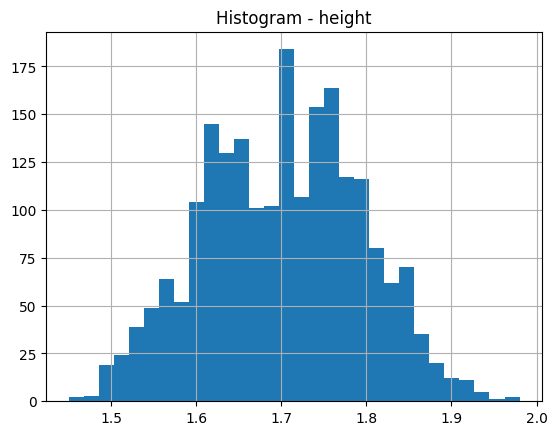

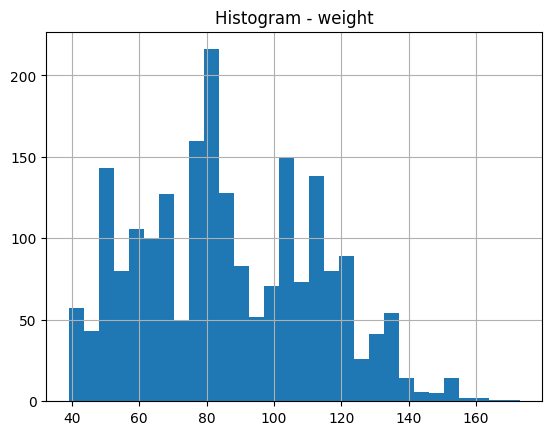

In [10]:
#plot distribution of numerical varibales
for cols in numerical_features:
    df[cols].hist(bins=30)
    plt.title(f"Histogram - {cols}")
    plt.show()

- Age varibale is right skewed and transformations may be needed to convert it to better align it to a normal distribution for better modeling. 
- Distribution of some variables such as the _frequency of physical activity_ variable does not follow a normal distribution and has spikes around certain values.
- Weight and Height resemble a normal distribution.

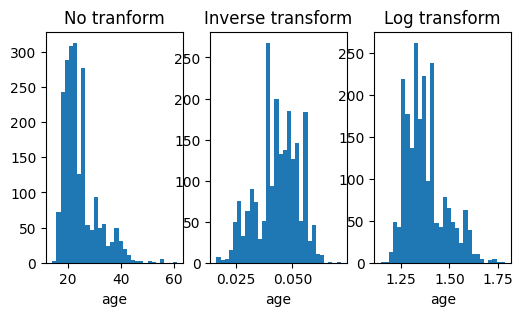

In [11]:
# Plot the distribution of age, inverse (1/x) transformed age and log transformed age
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(6,3))
ax[0].hist(df["age"], bins=30)
ax[1].hist(pow(df["age"], -1), bins=30)
ax[2].hist(np.log10(df["age"]), bins=30)
ax[0].set_title("No tranform")
ax[1].set_title("Inverse transform")
ax[2].set_title("Log transform")
ax[0].set_xlabel('age')
ax[1].set_xlabel('age')
ax[2].set_xlabel('age')
plt.show()

Log transformed or Inverse (1/x) transformed age variable are much closer to follow normal distribution.

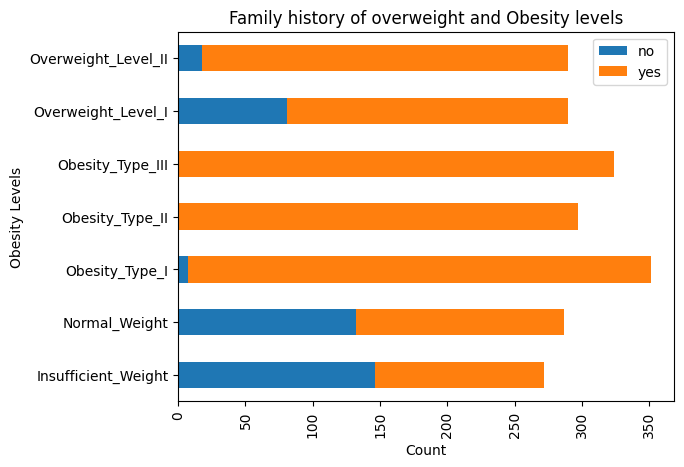

In [12]:
#get counts of observations for each obesity levels based on whether having a family history of overweight
grouped = df.groupby(["nobeyesdad","family_history_with_overweight"]).count()["age"].unstack()

# plot to view family history of overweight relationship with obesity levels
grouped.plot(kind='barh', stacked=True)
# sns.barplot(data=grouped, x="nobeyesdad", y="age", hue="family_history_with_overweight")
plt.title("Family history of overweight and Obesity levels")
plt.xlabel("Count")
plt.ylabel("Obesity Levels")
plt.legend(loc="best")
plt.xticks(rotation=90)
plt.show()

The above plot that most of the obese and overweight people have a family history of overweight. This indicates that family history may play a vital role in increasing the risk of obesity, which may be due to genetic factors.

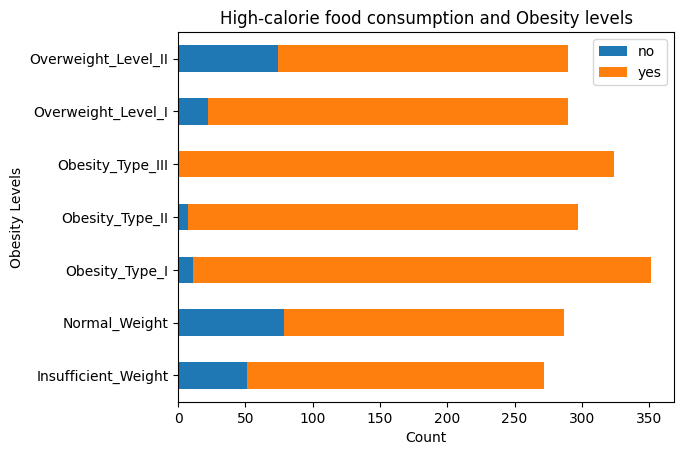

In [13]:
#get counts of observations for each obesity levels based on consumption of high-calorie food consumption
grouped = df.groupby(["nobeyesdad","favc"]).count()["age"].unstack()

# create plot to visualize high-calorie food consumption relationship with various obesity levels
grouped.plot(kind='barh', stacked=True)
plt.title("High-calorie food consumption and Obesity levels")
plt.xlabel("Count")
plt.ylabel("Obesity Levels")
plt.legend(loc="best")
plt.show()

The above shows that the majority of the obese people frequenly consume frequently high-calorie food. This indicates a potential presence of a relationship between obesity and frequent consumption of high-calorie foods.

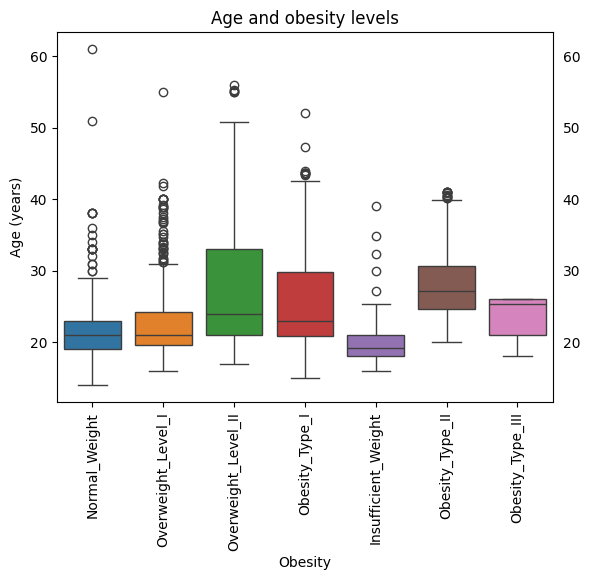

In [14]:
# plot to view relationship of age with obesity levels
sns.boxplot(x=df["nobeyesdad"], y=df["age"], hue=df["nobeyesdad"])
plt.tick_params(labelright=True)
plt.title("Age and obesity levels")
plt.ylabel("Age (years)")
plt.xlabel("Obesity")
plt.xticks(rotation=90)
plt.show()

We see some outliers in Normal and Overweight categories where individuals have much higher weight than the Obese people.

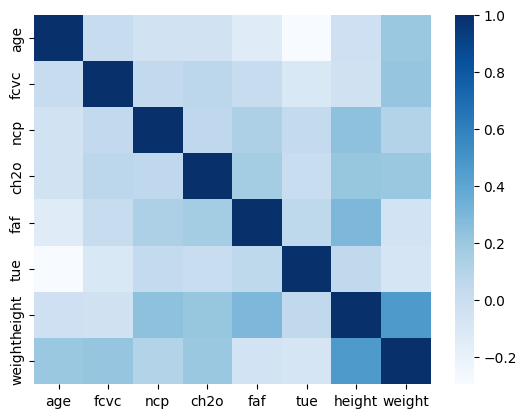

In [15]:
# plot correlation heatmap of numerical variables
sns.heatmap(df[numerical_features].corr(), cmap="Blues")
plt.show()

According to the above correlation heatmap, there are no highly correlated variables(> 90%) in the dataset.

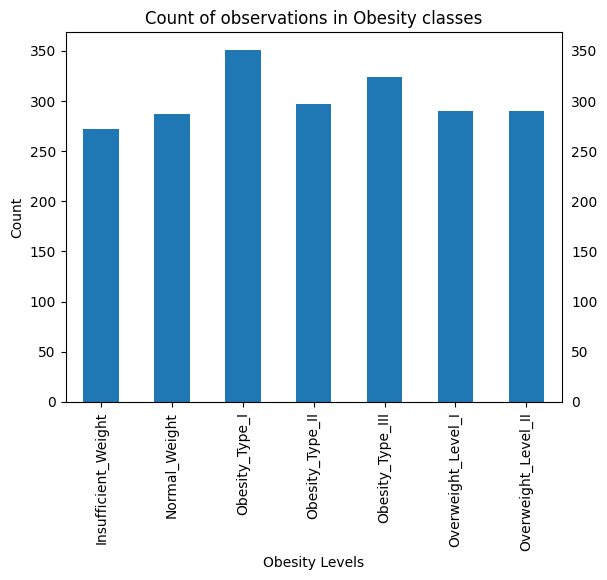

In [16]:
# check the count of classes in target
grouped = df.groupby("nobeyesdad").count()["gender"]
grouped.plot(kind="bar")
plt.tick_params(labelright=True)
plt.title("Count of observations in Obesity classes")
plt.ylabel("Count")
plt.xlabel("Obesity Levels")
plt.xticks(rotation=90)
plt.show()

From above plot we do not see any significant imbalance among the target classes.

In [17]:
# Check for missing values
df.isna().sum()

gender                            0
age                               0
height                            0
weight                            0
family_history_with_overweight    0
favc                              0
fcvc                              0
ncp                               0
caec                              0
smoke                             0
ch2o                              0
scc                               0
faf                               0
tue                               0
calc                              0
mtrans                            0
nobeyesdad                        0
dtype: int64

From above, we do not notice any missing values in the dataset.

###### Hypothesis testing

In [18]:
# chi square dependence test for categorical variables
for variable in categorical_features:
    table = pd.crosstab(df["nobeyesdad"], df[variable])
    stat, p, dof, expected = stats.chi2_contingency(table)
    print(f"variable:{variable}; p-value: {p}; chi-square statistic: {stat}")
    if p < 0.01:
        print(f"Reject H0: so variable {variable} has statistically significant association with target")
    else:
        print(f"Cannot reject H0: variable {variable} does not have any statistically significant association with target")

variable:gender; p-value: 8.088897293329991e-139; chi-square statistic: 657.746227342968
Reject H0: so variable gender has statistically significant association with target
variable:family_history_with_overweight; p-value: 4.2280167944702657e-131; chi-square statistic: 621.9794353945298
Reject H0: so variable family_history_with_overweight has statistically significant association with target
variable:favc; p-value: 1.4822362082358764e-47; chi-square statistic: 233.34130356133423
Reject H0: so variable favc has statistically significant association with target
variable:caec; p-value: 7.383852893286775e-159; chi-square statistic: 802.9772817566468
Reject H0: so variable caec has statistically significant association with target
variable:smoke; p-value: 1.5354243135096318e-05; chi-square statistic: 32.13783205600177
Reject H0: so variable smoke has statistically significant association with target
variable:scc; p-value: 3.773175792377203e-24; chi-square statistic: 123.02389868912441
Reje

Above chi-square test show that the categorical variables have statistically significant dependence with the target variable and will be informative in predicting the target classes.

In [19]:
# Stepwise addition of numerical feature in Ordinal Logistic Regression model 
from statsmodels.miscmodels.ordinal_model import OrderedModel
cat_type = CategoricalDtype(categories=["Insufficient_Weight", "Normal_Weight", 
                                        "Overweight_Level_I",
                                       "Overweight_Level_II","Obesity_Type_I",
                                       "Obesity_Type_II", "Obesity_Type_III",
                                       ], ordered=True)
cols = []
y = df[target].astype(cat_type)
for colname in numerical_features: 
    cols.append(colname)
    X = df[cols]
    mod_log = OrderedModel(y,
                        X,
                        distr='logit')

    res_log = mod_log.fit(method='bfgs', disp=False)
    print(f"Model Summary with features: {cols}")
    print(f"================================================================")
    print(res_log.summary())

Model Summary with features: ['age']
                             OrderedModel Results                             
Dep. Variable:             nobeyesdad   Log-Likelihood:                -4028.7
Model:                   OrderedModel   AIC:                             8071.
Method:            Maximum Likelihood   BIC:                             8111.
Date:                Wed, 07 Aug 2024                                         
Time:                        05:43:56                                         
No. Observations:                2111                                         
Df Residuals:                    2104                                         
Df Model:                           1                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
age                                   

The ordinal logistic regression model's _AIC/BIC_ reduces with the _stepwise addition_ of numerical features, which show that the numerical variables available in the dataset enable us to better predict the target variable.

#### Data Preparation

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif
from sklearn.preprocessing import MinMaxScaler
import numpy as np

###### Converted consumption of food between meals, consumption of alcohol and mode of transportation from categorical to ordinal variables to capture the natural ordering in the categories of these variables.

In [21]:
# change Consumption of food between meals to ordinal value
df["caec"] = df["caec"].replace(
    {
        "no": 0,
        "Sometimes": 1,
        "Frequently": 2,
        "Always": 3,
    }
)

In [22]:
# change Consumption of alcohol to ordinal value
df["calc"] = df["calc"].replace(
    {
        "no": 0,
        "Sometimes": 1,
        "Frequently": 2,
        "Always": 3,
    }
)

In [23]:
# change Consumption of alcohol to ordinal value
df["calc"] = df["calc"].replace(
    {
        "no": 0,
        "Sometimes": 1,
        "Frequently": 2,
        "Always": 3,
    }
)

In [24]:
# change Mode of transportation to ordinal value
df["mtrans"] = df["mtrans"].replace(
    {
        "Automobile": 0,
        "Motorbike": 1,
        "Public_Transportation": 2,
        "Bike": 3,
        "Walking": 4
    }
)

###### Applied logarithmic transform to the age variable to reduce skewness. Age is right skewed (as identified in milestone 3 analysis) and some models like ordinal logistic regression used in this study assumes data to be normally distributed for better fit.

In [25]:
# Apply Log Transform to age
df["age"] = np.log10(df["age"])

###### Applied binning to the frequency of physical activity, daily consumption of water, frequency of use of electronic devices, consumption of vegetables in meals, and number of meals variables to convert those from continuous to discrete variables. The distribution of these variables has spikes for certain values (as identified in milestone 3 analysis) and hence binning is applied to capture the information around those spikes.

In [26]:
# apply binning to the frequency of physical activity
df["faf"] = pd.cut(df["faf"], bins=[0.5,1,1.5,2,2.5,3],labels=["0.5to1","1to1.5","1.5to2","2to2.5","2.5to3"])
# apply binning to daily consumption of water 
df["ch2o"] = pd.cut(df["ch2o"], bins=[0,1,1.5,2,2.5,3],labels=["0to1","1to1.5","1.5to2","2to2.5","2.5to3"])
# apply binning to frequency of use of electronic devices
df["tue"] = pd.cut(df["tue"], bins=[0,0.5,1,1.5,2],labels=["0to0.5","0.5to1","1to1.5","1.5to2"])

In [27]:
# apply binning to consumption of vegetables in meals
def fcvc_transform(x):
    if x < 2:
        return "less_than_2"
    if x < 2.5:
        return "between2_2.5"
    else:
        return "greater_than_2.5"
df["fcvc"] = df["fcvc"].apply(fcvc_transform)

In [28]:
# apply binning to number of meals
def ncp_transform(x):
    if x > 1 and x < 1.1:
        return "around_1"
    elif x > 1.1 and x < 3:
        return "between1.1_3"
    elif x > 3 and x < 3.1:
        return "around 3"
    else:
        return "greater_than_3"
df["ncp"] = df["ncp"].apply(ncp_transform)

###### Encode Categorical features with _dummy_ variables because we need to convert categorical classes to numerical values for modeling. Modeling packages expects features to be numerical values. Also,  we are dropping the first value of dummy variable to prevent multicollinearity.

In [29]:
# separate features and target
target_column = "nobeyesdad"
features = df.drop(columns = target_column)
target = df[target_column]

In [30]:
# get dummy variables, dropping the first dummy variable
features_with_dummies = pd.get_dummies(features, drop_first=True, dtype="int")

In [31]:
#train test split
features_train, features_test, target_train, target_test = train_test_split(
    features_with_dummies, target, test_size=0.2, random_state=42)

In [32]:
# define scaler
scaler = MinMaxScaler()

In [33]:
#fit scaler to features
scaler.fit(features_train)

MinMaxScaler()

In [34]:
# generate scaled features using scaler
scaled_features_train = scaler.transform(features_train)
scaled_features_test = scaler.transform(features_test)


<div class="alert alert-block alert-info">
<b></b>At this point we have the train and test set features transformed and scaled to be used in modeling.
</div>

#### Modeling and Results

In [35]:
# import modules

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, KFold, learning_curve, LearningCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.dummy import DummyClassifier
import numpy as np
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Below four models were built and evaluated using accuracy, precision, recall, and F1-score metrics. The model evaluation was performed using Cross-Validation. Grid search was used to select hyperparameters for each of the models. Created a Dummy Classifier as a baseline model to compare with the trained models. It helped to check whether the trained model is better than random guessing.

- Ordinal Logistic Regression
- KNN
- Decision Trees
- Random Forest


We are using **accuracy**, **precision**, **recall**, **F1-score** to evaluate model performance. Our data does not suffer from significant _class imbalance_ in the target variable, so we can use _accuracy_ metric. However, accuracy does not capture the model's predictive power to predict the target classes correctly. Hence, we are also evaluating _precision_, _recall_, and _F1-score_. Based on the nature of the problem, it is important to correctly identify the target class in an optimistic manner, but also, at the same time have good correctness in the target class, so that the obesity management efforts and resources are directed to the right people. _Precision_ is the proportion of every observation that is predicted positive is actually positive. Models with high precision are pessimistic because they predict a class only when it is very certain. On the other hand, models with high recall are optimistic and try to predict as many true positives as possible out of all the actual positive observations. Furthermore, we are also checking the _F1-score_, which is a good measure of the balance between precision and recall. 

Additionally, we are using **Confusion Matrix** to evaluate the overall performance of the selected model. A confusion matrix is a table that displays a grid of the number of observations in the actual class against the predicted class. It shows number of the correct and incorrect predictions.

In [36]:
#create dummy classifier to provide random predictions
dummy = DummyClassifier(strategy="uniform", random_state=1)

In [37]:
#fit and get dummy predictions
dummy_model = dummy.fit(scaled_features_train, target_train)
predicted_test_dummy = dummy_model.predict(scaled_features_test)

In [38]:
#function to calculate and print scores
def calculate_and_display_scores(type, actual, pred):
    acc = accuracy_score(actual, pred)
    f1 = f1_score(actual, pred, average='macro')
    precision = precision_score(actual, pred, average='macro')
    recall = recall_score(actual, pred, average='macro')
    print(f"Accuracy {type}  : {acc}")
    print(f"Precision {type} : {precision}")
    print(f"Recall {type}    : {recall}")
    print(f"F1-score {type}  : {f1}")
    return acc,precision,recall,f1

In [39]:
#print scores for dummy classifier
acc_dummy,precision_dummy, recall_dummy, f1_score_dummy = calculate_and_display_scores("dummy", target_test, predicted_test_dummy)

Accuracy dummy  : 0.15602836879432624
Precision dummy : 0.1560382899834198
Recall dummy    : 0.16088841081054653
F1-score dummy  : 0.15715616552853087


In [40]:
#define Stratified Kfold cross validation object
stratified_cv = StratifiedKFold(
    n_splits=10,
    shuffle=True,
    random_state=1
)


1. Ordinal Logistic Regression

Converted the target categorical variable to ordinal variable to capture the natural order in obesity levels for fitting ordinal logistic regression model.

In [41]:
# Convert to ordinal
cat_type = CategoricalDtype(categories=["Insufficient_Weight", "Normal_Weight", 
                                        "Overweight_Level_I",
                                       "Overweight_Level_II","Obesity_Type_I",
                                       "Obesity_Type_II", "Obesity_Type_III",
                                       ], ordered=True)
target_train_ord = target_train.astype(cat_type)
target_test_ord = target_test.astype(cat_type)

In [42]:
# run cross validation of Ordinal Logistic Regression
def get_labels(x, target):
    return target.cat.categories[x]

acc = []
X = scaled_features_train
y = target_train_ord.reset_index(drop=True)
for i, (train_index, test_index) in enumerate(stratified_cv.split(X, y)): 
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    mod_log = OrderedModel(y_train,
                        X_train,
                        distr='logit')

    res_log = mod_log.fit(method='bfgs', disp=False)
    predicted = res_log.model.predict(res_log.params, exog=X_test)
    pred_choice = predicted.argmax(1)
    predicted_obesity = pd.Series(get_labels(pred_choice, y_test))
    accuracy = accuracy_score(y_test, predicted_obesity)
    acc.append(accuracy)
    print("Iteration:",i, "Train:", train_index.shape, "Validation:", test_index.shape, "Score:", accuracy) 
print(acc)

Iteration: 0 Train: (1519,) Validation: (169,) Score: 0.9053254437869822
Iteration: 1 Train: (1519,) Validation: (169,) Score: 0.9112426035502958
Iteration: 2 Train: (1519,) Validation: (169,) Score: 0.8757396449704142
Iteration: 3 Train: (1519,) Validation: (169,) Score: 0.9112426035502958
Iteration: 4 Train: (1519,) Validation: (169,) Score: 0.8875739644970414
Iteration: 5 Train: (1519,) Validation: (169,) Score: 0.8994082840236687
Iteration: 6 Train: (1519,) Validation: (169,) Score: 0.8757396449704142
Iteration: 7 Train: (1519,) Validation: (169,) Score: 0.8757396449704142
Iteration: 8 Train: (1520,) Validation: (168,) Score: 0.9226190476190477
Iteration: 9 Train: (1520,) Validation: (168,) Score: 0.9166666666666666
[0.9053254437869822, 0.9112426035502958, 0.8757396449704142, 0.9112426035502958, 0.8875739644970414, 0.8994082840236687, 0.8757396449704142, 0.8757396449704142, 0.9226190476190477, 0.9166666666666666]


In [43]:
# Average score from Cross validation of Ordinal logistic regression model
np.mean(acc)

0.898129754860524

Check the model's performance against test set.

In [44]:
# get max index of predicted probabilities
predicted = res_log.model.predict(res_log.params, exog=scaled_features_test)
pred_choice = predicted.argmax(1)

In [45]:
# get category label for the highest predicted probabilites
def get_labels(x, target):
    return target.cat.categories[x]
predicted_obesity = pd.Series(get_labels(pred_choice, target_test_ord))

In [46]:
# print test scores
acc_logistic,precision_logistic, recall_logistic, f1_score_logistic = calculate_and_display_scores("ordinal logistic", target_test, predicted_obesity)

Accuracy ordinal logistic  : 0.933806146572104
Precision ordinal logistic : 0.9304757171045902
Recall ordinal logistic    : 0.931555177788294
F1-score ordinal logistic  : 0.9307610274422426


2. KNN Model

In [47]:
# define hyper parameters
hyperparameters_knn = {
    "n_neighbors": np.arange(3,10,1),
    "p":[1,2,3]
}

In [48]:
# create gridsearch
gcv_knn = GridSearchCV(
    KNeighborsClassifier(),
    hyperparameters_knn,
    cv=stratified_cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

In [49]:
# perform gridsearch to select best model hyperparameters
best_model_knn = gcv_knn.fit(scaled_features_train, target_train)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


In [50]:
#perform nested cross validation for model evaluation
scores_knn = cross_val_score(gcv_knn, 
                                  scaled_features_train, 
                                  target_train,
                                  cv=stratified_cv,
                                  scoring="accuracy",
                                  verbose=1
                                 )

Fitting 10 folds for each of 21 candidates, totalling 210 fits
Fitting 10 folds for each of 21 candidates, totalling 210 fits
Fitting 10 folds for each of 21 candidates, totalling 210 fits
Fitting 10 folds for each of 21 candidates, totalling 210 fits
Fitting 10 folds for each of 21 candidates, totalling 210 fits
Fitting 10 folds for each of 21 candidates, totalling 210 fits
Fitting 10 folds for each of 21 candidates, totalling 210 fits
Fitting 10 folds for each of 21 candidates, totalling 210 fits
Fitting 10 folds for each of 21 candidates, totalling 210 fits
Fitting 10 folds for each of 21 candidates, totalling 210 fits


In [51]:
# Show cross validation scores for all 10 fold validation
scores_knn

array([0.68047337, 0.64497041, 0.66863905, 0.65088757, 0.69230769,
       0.71005917, 0.68047337, 0.65680473, 0.63095238, 0.67857143])

In [52]:
#average score from 10 fold validation
scores_knn.mean()

0.6694139194139195

Check the select model's performance against test set.

In [53]:
print(f"Best Model params: {best_model_knn.best_estimator_.get_params()}")

Best Model params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


In [54]:
# get test set predictions using selected model
predicted_test_knn = best_model_knn.predict(scaled_features_test)

In [55]:
# print test scores
acc_knn,precision_knn, recall_knn, f1_score_knn = calculate_and_display_scores("knn", target_test, predicted_test_knn)

Accuracy knn  : 0.6595744680851063
Precision knn : 0.6546418532586514
Recall knn    : 0.6483539388203301
F1-score knn  : 0.6432829468045499


3. Decision Tree model

In [56]:
# define hyper parameters
hyperparameters_dtree = {
    "max_depth": [100,200, 300, 400],
    "min_impurity_decrease": [0, 0.05, 0.1, 0.2]
}

In [57]:
# create gridsearch
gcv_dtree = GridSearchCV(
    DecisionTreeClassifier(),
    hyperparameters_dtree,
    cv=stratified_cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

In [58]:
# perform gridsearch to select best model hyperparameters
best_model_dtree = gcv_dtree.fit(scaled_features_train, target_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [59]:
#perform cross validatio for model evaluation
scores_dtree = cross_val_score(gcv_dtree, 
                                  scaled_features_train, 
                                  target_train,
                                  cv=stratified_cv,
                                  scoring="accuracy",
                                  verbose=1
                                 )

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [60]:
# Show cross validation scores for all 10 fold validation
scores_dtree

array([0.96449704, 0.93491124, 0.90532544, 0.89940828, 0.94674556,
       0.9408284 , 0.92307692, 0.93491124, 0.92857143, 0.94047619])

In [61]:
#average score from 10 fold validation
scores_dtree.mean()

0.9318751761059453

Check the select model's performance against test set.

In [62]:
print(f"Best Model params: {best_model_dtree.best_estimator_.get_params()}")

Best Model params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 300, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [63]:
# get test set predictions using best model
predicted_test_dtree = best_model_dtree.predict(scaled_features_test)

In [64]:
# print test scores 
acc_dtree,precision_dtree, recall_dtree, f1_score_dtree = calculate_and_display_scores("dtree", target_test, predicted_test_dtree)

Accuracy dtree  : 0.9456264775413712
Precision dtree : 0.9453387032423114
Recall dtree    : 0.9452782468339436
F1-score dtree  : 0.9451828007539264


3. Random Forest model

In [65]:
# define hyper parameters
hyperparameters_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [100,200, 300, 400]
}

In [66]:
# create gridsearch
gcv_rf = GridSearchCV(
    RandomForestClassifier(),
    hyperparameters_rf,
    cv=stratified_cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

In [67]:
# perform gridsearch to select best model based on hyperparameters
best_model_rf = gcv_rf.fit(scaled_features_train, target_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [68]:
#perform cross validatio for model evaluation
scores_rf = cross_val_score(gcv_rf, 
                                  scaled_features_train, 
                                  target_train,
                                  cv=stratified_cv,
                                  scoring="accuracy",
                                  verbose=1
                                 )

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [69]:
# Show scores for all 10 fold validation
scores_rf

array([0.96449704, 0.95857988, 0.93491124, 0.95857988, 0.93491124,
       0.9704142 , 0.93491124, 0.93491124, 0.94642857, 0.95238095])

In [70]:
#average score from 10 fold validation
scores_rf.mean()

0.9490525500140885

Check the select model's performance against test set.

In [71]:
print(f"Best Model params: {best_model_rf.best_estimator_.get_params()}")

Best Model params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 200, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [72]:
# get test set predictions using selected model
predicted_test_rf = best_model_rf.predict(scaled_features_test)

In [73]:
# print test scores
acc_rf,precision_rf, recall_rf, f1_score_rf = calculate_and_display_scores("rf", target_test, predicted_test_rf)

Accuracy rf  : 0.950354609929078
Precision rf : 0.9491743484166217
Recall rf    : 0.9501832549568129
F1-score rf  : 0.9495085871892149


In [74]:
best_model_rf.best_estimator_.feature_importances_

array([0.11729518, 0.12069455, 0.33869747, 0.03790043, 0.03537664,
       0.02661346, 0.06337835, 0.03347013, 0.017618  , 0.03700904,
       0.01062865, 0.00133779, 0.0171755 , 0.01903316, 0.00315177,
       0.00787379, 0.01493573, 0.00875225, 0.01267719, 0.00684533,
       0.00635492, 0.01391202, 0.0042349 , 0.00689592, 0.02065072,
       0.00550831, 0.0119788 ])

Get Top 10 important features of Random Forest Model

In [75]:
# feature importance of RF model
feature_names = features_train.columns

mdi_importances = pd.Series(
    best_model_rf.best_estimator_.feature_importances_[:10], index=feature_names[:10]
).sort_values(ascending=True)

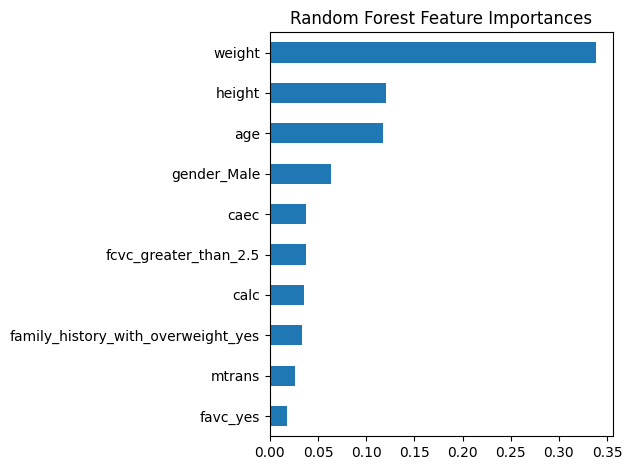

In [76]:
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances")
ax.figure.tight_layout()

Lets plot the _test scores_ of Logistic regression, KNN, Decision Tree and Random Forest classifiers

In [77]:
# create a dataframe forall the model scores
scores_df = pd.DataFrame(data=[
    [acc_dummy,precision_dummy, recall_dummy, f1_score_dummy],
    [acc_logistic, precision_logistic , recall_logistic, f1_score_logistic],
    [acc_knn,precision_knn, recall_knn, f1_score_knn],
    [acc_dtree, precision_dtree, recall_dtree, f1_score_dtree],
    [acc_rf, precision_rf, recall_rf, f1_score_rf]], 
columns=["Accuracy", "Precision", "Recall", "F1-score"],
index=["Dummy Model", "Ordinal Logistic Regression","KNN","Decision Tree", "Random Forest"])
scores_df.round(3)

,Accuracy,Precision,Recall,F1-score
Dummy Model,0.156,0.156,0.161,0.157
Ordinal Logistic Regression,0.934,0.930,0.932,0.931
KNN,0.660,0.655,0.648,0.643
Decision Tree,0.946,0.945,0.945,0.945
Random Forest,0.950,0.949,0.950,0.950


In [79]:
# create a html table of the above scores
scores_df.round(3).to_html("scores.html")
scores_df.loc[["Random Forest"]].round(3).to_html("rf_scores.html")

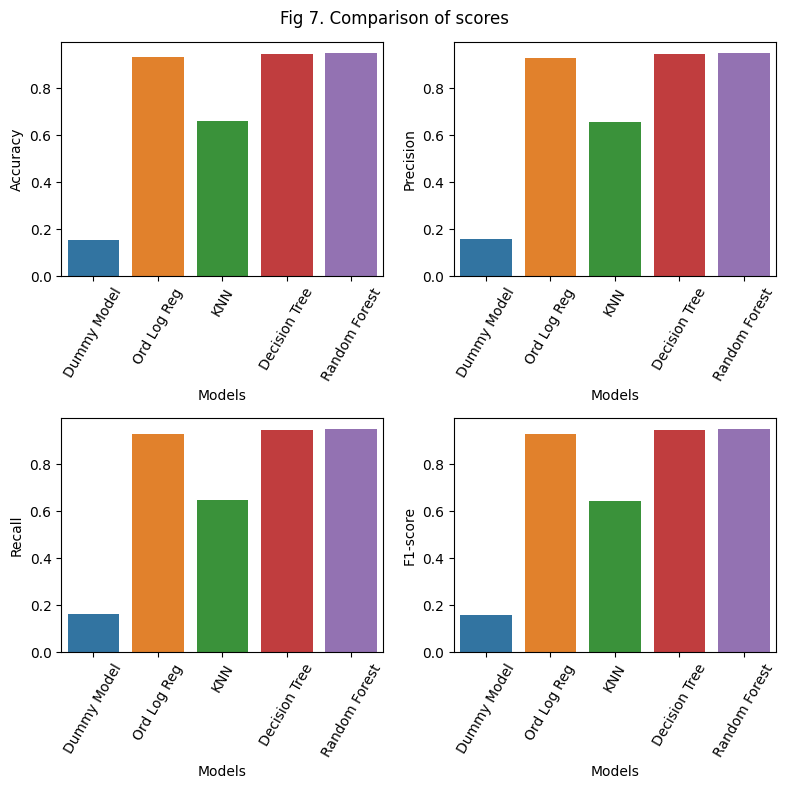

In [80]:
# plot the model scores
fig,ax = plt.subplots(nrows=2,ncols=2,figsize = (8,8))
fig.suptitle("Fig 7. Comparison of scores")
sns.barplot(ax=ax[0,0],data=scores_df, x=scores_df.index, y="Accuracy", hue=scores_df.index)
ax[0,0].set_xlabel("Models")
ax[0,0].set_xticks(scores_df.index)
ax[0,0].set_xticklabels(["Dummy Model", "Ord Log Reg","KNN","Decision Tree", "Random Forest"], rotation=60)

sns.barplot(ax=ax[0,1],data=scores_df, x=scores_df.index, y="Precision",hue=scores_df.index)
ax[0,1].set_xlabel("Models")
ax[0,1].set_xticks(scores_df.index)
ax[0,1].set_xticklabels(["Dummy Model", "Ord Log Reg","KNN","Decision Tree", "Random Forest"], rotation=60)

sns.barplot(ax=ax[1,0],data=scores_df, x=scores_df.index, y="Recall",hue=scores_df.index)
ax[1,0].set_xlabel("Models")
ax[1,0].set_xticks(scores_df.index)
ax[1,0].set_xticklabels(["Dummy Model", "Ord Log Reg","KNN","Decision Tree", "Random Forest"], rotation=60)

sns.barplot(ax=ax[1,1],data=scores_df, x=scores_df.index, y="F1-score",hue=scores_df.index)
ax[1,1].set_xlabel("Models")
ax[1,1].set_xticks(scores_df.index)
ax[1,1].set_xticklabels(["Dummy Model", "Ord Log Reg","KNN","Decision Tree", "Random Forest"], rotation=60)

plt.tight_layout()
plt.show()

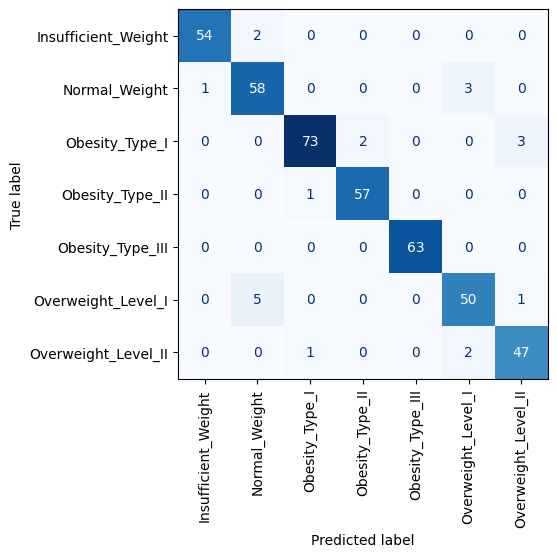

In [81]:
# plot confusion matrix using sklearn's ConfusionMatrixDisplay module
ConfusionMatrixDisplay.from_predictions(target_test, predicted_test_rf, 
                                        display_labels=best_model_rf.classes_,
                                        colorbar=False, 
                                        cmap="Blues")
# plt.title("Fig 11. Confusion Matrix of Random Forest")
plt.xticks(rotation=90)
plt.show()

#### References

Estimation of obesity levels based on eating habits and physical condition. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.

Palechor, F.M., de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data Brief. 25, 104344. https://doi.org/10.1016/j.dib.2019.104344